# Lab-Feature-Extraction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('/Users/mariasoriano/Desktop/Week-5/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df= customer_df.rename(columns=str.lower)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 1. Open the categoricals variable we created before.

In [5]:
categoricals = customer_df.select_dtypes([object])
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

In [6]:
# drop customer from categoricals
categoricals = categoricals.drop(columns=['customer'], axis=1)

In [7]:

def cols_plot(df):
    for col in df.columns:
        sns.histplot(customer_df[col])
        plt.show()

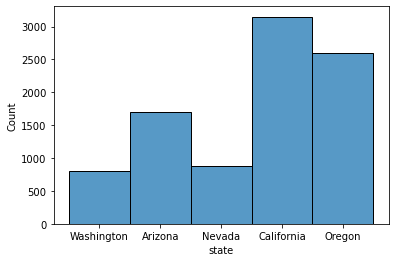

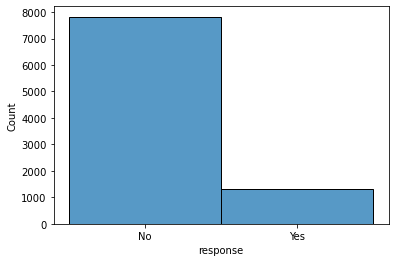

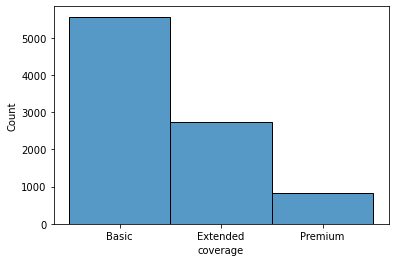

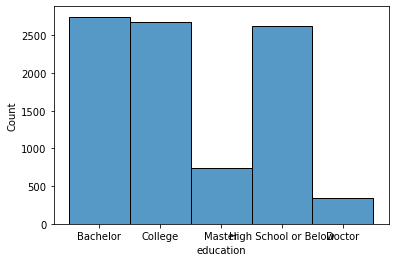

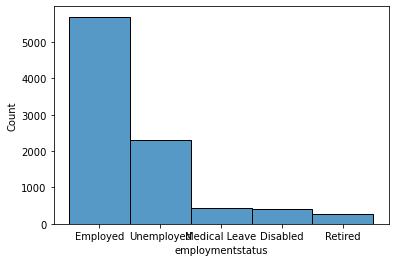

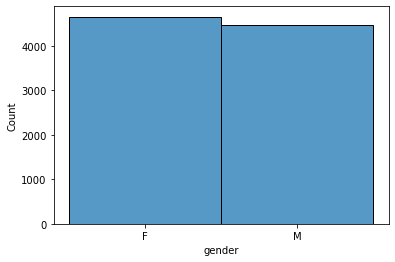

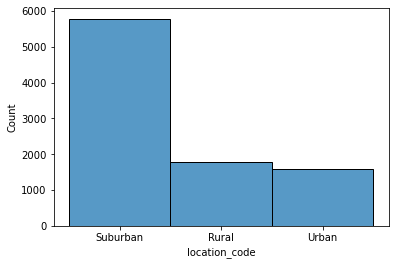

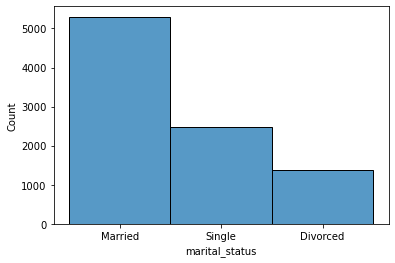

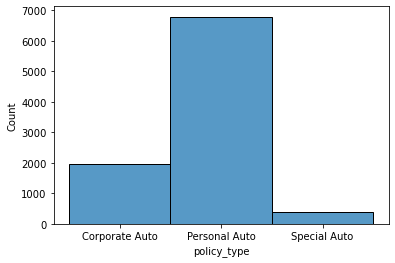

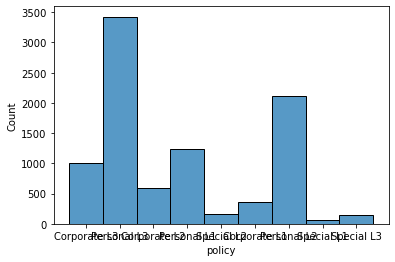

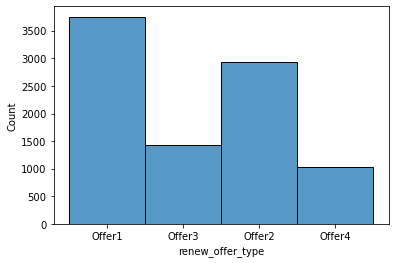

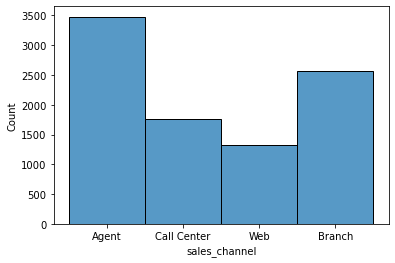

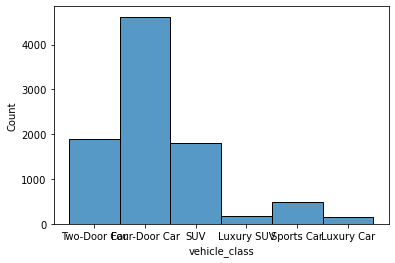

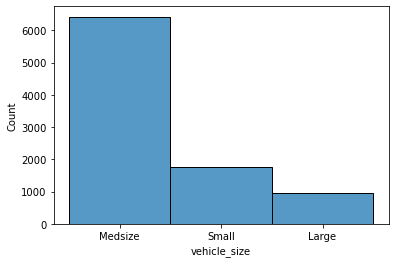

In [8]:
cols_plot(categoricals)

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

#### Policy Type and Policy seem redundant to me since Policy Type includes policy + vehicle. I would get rid of the first part in this col.

In [9]:
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
categoricals['policy_type'] = categoricals['policy_type'].str.replace('Corporate', '')
categoricals['policy_type'] = categoricals['policy_type'].str.replace('Personal', '')
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
categoricals['policy_type'].unique()

array([' Auto', 'Special Auto'], dtype=object)

### 4. Plot time variable. Can you extract something from it?

<AxesSubplot:ylabel='effective_to_date'>

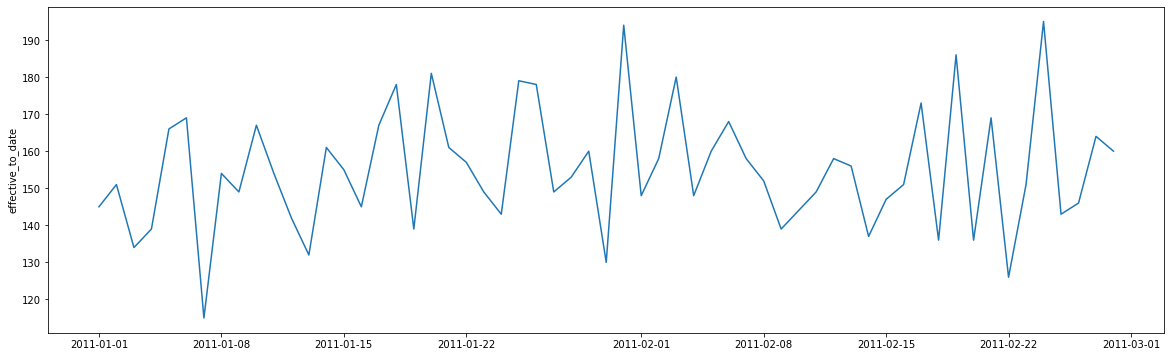

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x=customer_df['effective_to_date'].unique(), y=customer_df['effective_to_date'].value_counts())

# Lab-Comparing-Regression-Models

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

#### First I want to make sure I have my data divided into numerical_continuous, numerical_discrete and categorical variables.

In [13]:
numerical = customer_df.select_dtypes(include = ['number', 'datetime'])

In [14]:
num_discrete = numerical[['number_of_open_complaints', 'number_of_policies']]
num_continuous = numerical.drop(['number_of_open_complaints', 'number_of_policies', 'effective_to_date'], axis=1)

### Let's Split X and y now. Diferentiating among continuous, discrete and categorical as well

In [15]:
y = customer_df['total_claim_amount']
X_continuous = num_continuous
X_discrete = num_discrete
X_categorical = categoricals
X = pd.concat([X_continuous, X_discrete, X_categorical], axis=1)

In [16]:
#XyTestSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [17]:
#numerical['income']


In [18]:
#mean_income = numerical[(numerical['income'] != 0)]['income'].mean()
#numerical.income.loc[numerical.income == 0, 'income'] = mean_income

### 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

#### _"In statistics, an outlier is an observation point that is distant from other observations."_

Ok, let's **find the outliers** first

In [19]:
#categoricals.isnull().sum()/len(categoricals)

In [20]:
def check_outliers(df):
    for col in df:
        sns.boxplot(x=col, data=df)
        plt.show()

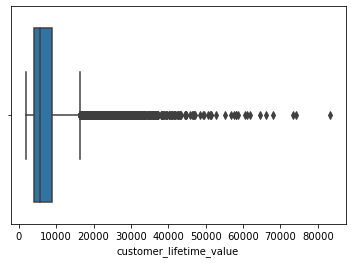

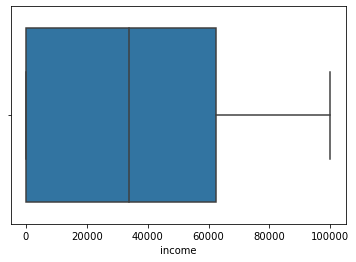

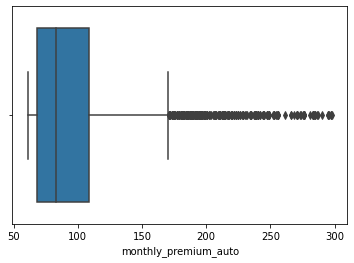

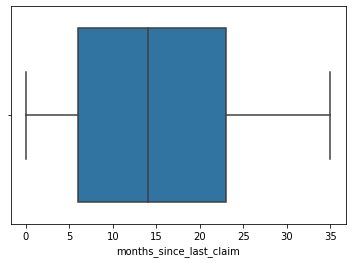

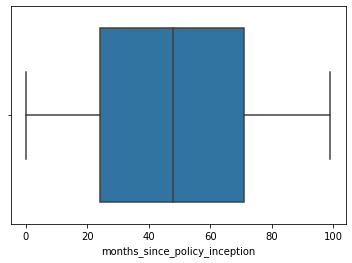

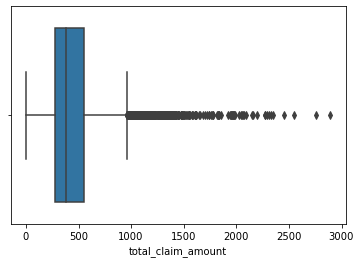

In [21]:
check_outliers(num_continuous)

### Reasons why it's important to investigate and remove outliers:
- They could be data entry errors.
- They could bias the results.
- They could not represent the real value.

### We have _outliers_ at _'total_claim_amount', 'monthly_premium_auto' and 'customer_lifetime_value'_


##### I'm going to detect and remove the outliers using IQR (Interquartile Range). The IQR corresponds to the distance between Q1 and Q3. I will do it using a function but I will also add how I could do it manually.


At first, I will drop the col 'effective_too_date' because it's a datetime col and could mess up things here.
Also, I will check one more time the boxplot for the columns that contain outliers. Using the 'check_outliers' function. As you will see, the outliers are gone! :)

In [22]:
numerical = numerical.drop(columns=['effective_to_date'], axis=1)

In [23]:
def remove_outliers_IQR(df, q1_value = 0.25, q3_value = 0.75):
    Q1=df.quantile(q1_value)
    Q3=df.quantile(q3_value)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [24]:
num_no_outliers = remove_outliers_IQR(numerical).head()
num_no_outliers.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69.0,32,5,0.0,1.0,384.811147
1,6979.535903,0,94.0,13,42,0.0,8.0,NaN
2,12887.431650,48767,108.0,18,38,0.0,2.0,566.472247
3,7645.861827,0,106.0,18,65,0.0,7.0,529.881344
4,2813.692575,43836,73.0,12,44,0.0,1.0,138.130879


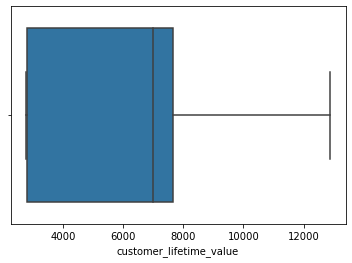

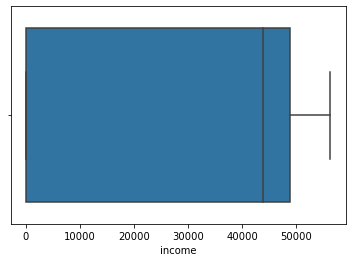

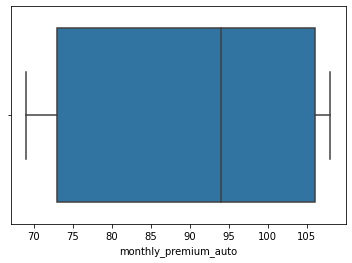

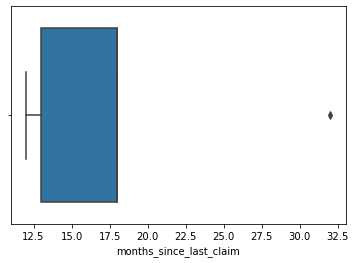

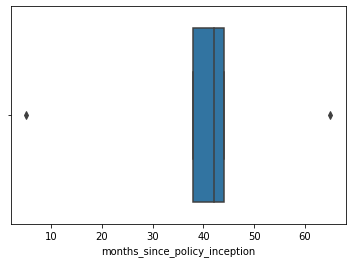

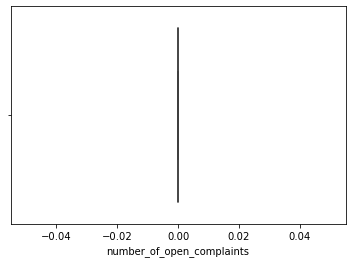

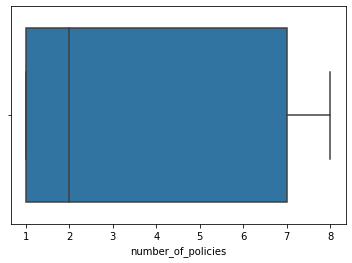

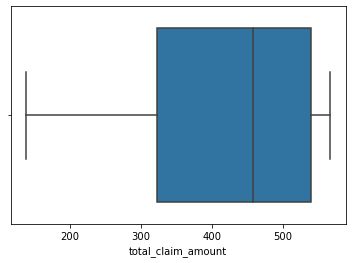

In [25]:
#numerical.info()
check_outliers(num_no_outliers)

### This is how I would remove the outliers manually using the quantiles

In [26]:
'''max_treshold1 = numerical['total_claim_amount'].quantile(0.95)
min_treshold1 = numerical['total_claim_amount'].quantile(0.05)
print('total_claim_amout:')
print('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold1), 2)))
print('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold1), 2)))'''

"max_treshold1 = numerical['total_claim_amount'].quantile(0.95)\nmin_treshold1 = numerical['total_claim_amount'].quantile(0.05)\nprint('total_claim_amout:')\nprint('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold1), 2)))\nprint('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold1), 2)))"

In [27]:
#numerical_out1 = numerical[(numerical['total_claim_amount']<max_treshold1) & (numerical['total_claim_amount']>min_treshold1)]
#numerical_out1.head(4)

In [28]:
'''max_treshold2 = numerical['monthly_premium_auto'].quantile(0.95)
min_treshold2 = numerical['monthly_premium_auto'].quantile(0.05)
print('monthly_premium_auto:')
print('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold2), 2)))
print('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold2), 2)))'''

"max_treshold2 = numerical['monthly_premium_auto'].quantile(0.95)\nmin_treshold2 = numerical['monthly_premium_auto'].quantile(0.05)\nprint('monthly_premium_auto:')\nprint('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold2), 2)))\nprint('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold2), 2)))"

In [29]:
#numerical_out2 = numerical_out1[(numerical_out1['monthly_premium_auto']<max_treshold2) & (numerical_out1['monthly_premium_auto']>min_treshold2)]
#numerical_out2.head(4)

In [30]:
'''max_treshold3 = numerical['customer_lifetime_value'].quantile(0.95)
min_treshold3 = numerical['customer_lifetime_value'].quantile(0.05)
print('customer_lifetime_value:')
print('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold3), 2)))
print('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold3), 2)))'''

"max_treshold3 = numerical['customer_lifetime_value'].quantile(0.95)\nmin_treshold3 = numerical['customer_lifetime_value'].quantile(0.05)\nprint('customer_lifetime_value:')\nprint('Max treshold is: {} for 0.95 quantile.'.format(round((max_treshold3), 2)))\nprint('Min treshold is: {} for 0.05 quantile.'.format(round((min_treshold3), 2)))"

In [31]:
#numerical_out3 = numerical_out2[(numerical_out2['customer_lifetime_value']<max_treshold3) & (numerical_out2['customer_lifetime_value']>min_treshold3)]
#numerical_out3.head(4)

#### After this I would change the name of the DataFrame to make it more clear. And that's it! :)

In [68]:
#num_no_outliers = numerical_out3

#### But let's continue now with the DataFrame that has not outliers thanks to our function!

In [33]:
num_no_outliers.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69.0,32,5,0.0,1.0,384.811147
1,6979.535903,0,94.0,13,42,0.0,8.0,NaN
2,12887.431650,48767,108.0,18,38,0.0,2.0,566.472247
3,7645.861827,0,106.0,18,65,0.0,7.0,529.881344
4,2813.692575,43836,73.0,12,44,0.0,1.0,138.130879


## 3. Create a copy of the dataframe for the data wrangling.

## 4. Normalize the continuous variables. You can use any method you want.

Let's create a new variable where I'm going to store the cols where I removed the outliers and the rest of continuous columns.

In [34]:
X_continuous = num_no_outliers.drop(columns=['number_of_open_complaints', 'number_of_policies'], axis=1)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_continuous)
X_cont_scaled = scaler.transform(X_continuous)
X_cont_scaled = pd.DataFrame(X_cont_scaled, columns=X_continuous.columns)

In [36]:
X_cont_scaled.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.000000,1.000000,0.000000,1.00,0.000000,0.575896
1,0.416441,0.000000,0.641026,0.05,0.616667,NaN
2,1.000000,0.866599,1.000000,0.30,0.550000,1.000000
3,0.482258,0.000000,0.948718,0.30,1.000000,0.914575
4,0.004956,0.778974,0.102564,0.00,0.650000,0.000000


## 5. Encode the categorical variables

- **OneHotEncoder:** state, marital status, policy type, policy, renew offercustomer_df, sales channel, vehicle class 
- **OrdinalEncoder:** coverage, employment status, location code, vehicle size

In [37]:
#deleting the word 'offer' from the 'renew_offer_type' since it's redundant before doing the hotencoder
X['renew_offer_type'].str.replace('Offer', '')

0       1
1       3
2       1
3       1
4       1
       ..
9129    2
9130    1
9131    1
9132    3
9133    4
Name: renew_offer_type, Length: 9134, dtype: object

**OneHotEncoder:**

In [38]:
#casting the cols where I want to do the OneHotEncoder
to_encode = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']
#applying the encoder
X_train = pd.get_dummies(X, columns = to_encode, drop_first=True)

In [41]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,response,coverage,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2763.519279,56274,69,32,5,384.811147,0,1,No,Basic,...,0,0,0,0,0,0,0,0,0,1
1,6979.535903,0,94,13,42,1131.464935,0,8,No,Extended,...,1,0,0,0,0,0,0,0,0,0
2,12887.431650,48767,108,18,38,566.472247,0,2,No,Premium,...,0,0,0,0,0,0,0,0,0,1
3,7645.861827,0,106,18,65,529.881344,0,7,No,Basic,...,0,0,0,1,0,0,0,1,0,0
4,2813.692575,43836,73,12,44,138.130879,0,1,No,Basic,...,0,0,0,0,0,0,0,0,0,0


**OrdinalEncoder:**

In [65]:
X_train['coverage'].unique()
coverage_list = ['Basic', 'Extended', 'Premium']

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories=[coverage_list])
ord_enc.fit(X_train[['coverage']])
pd.DataFrame(ord_enc.transform(X_train[['coverage']]))

,0
0,0.0
1,1.0
2,2.0
3,0.0
4,0.0
...,...
9129,0.0
9130,1.0
9131,1.0
9132,1.0


In [67]:
X_train['employmentstatus'].unique()
employment_list = ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']

ord_enc = OrdinalEncoder(categories=[employment_list])
ord_enc.fit(X_train[['employmentstatus']])
pd.DataFrame(ord_enc.transform(X_train[['employmentstatus']]))

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
9129,0.0
9130,0.0
9131,1.0
9132,0.0


In [74]:
X_train['location_code'].unique()
location_list = ['Suburban', 'Rural', 'Urban']

ord_enc = OrdinalEncoder(categories=[location_list])
ord_enc.fit(X_train[['location_code']])
pd.DataFrame(ord_enc.transform(X_train[['location_code']]))

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
9129,2.0
9130,0.0
9131,0.0
9132,0.0


In [77]:
X_train['vehicle_size'].unique()
vehicle_list = ['Medsize', 'Small', 'Large']

ord_enc = OrdinalEncoder(categories=[vehicle_list])
ord_enc.fit(X_train[['vehicle_size']])
pd.DataFrame(ord_enc.transform(X_train[['vehicle_size']]))

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9129,0.0
9130,0.0
9131,0.0
9132,2.0


In [ ]:
y = customer_df['total_claim_amount']
X_continuous = num_continuous
X_discrete = num_discrete
X_categorical = categoricals
X = pd.concat([X_continuous, X_discrete, X_categorical], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [ ]:
#%%writefile -a funcions.py
#import funcions
#funcions.remove_outliers_IQR()


In [ ]:
display(num_continuous[['monthly_premium_auto']])

In [ ]:
cols_plot(num_continuous)

In [ ]:
#from sklearn.preprocessing import PowerTransformer

#power = PowerTransformer()
#power.fit(num_continuous.loc[:,to_skew])
#power.transform(num_continuous[:,to_skew])

In [ ]:
plot months since last claim

In [ ]:

# # We'll start with MinMaxEncoder

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_cont)
X_cont_scaled = scaler.transform(X_cont)
X_cont_scaled = pd.DataFrame(X_cont_scaled, columns=X_cont.columns)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1233) 
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
# Encode categoricals: Discriminate between ordinal categoricals and nominals